In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
df['Churn'] = df['Churn'].map({'No': 0,
                            'Yes': 1})

In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [27]:
df.drop(['customerID'], axis = 1, inplace = True)

In [28]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [29]:
df.shape

(7043, 20)

In [30]:
X_temp = df.copy()

encoder = LabelEncoder()

for column in X_temp.select_dtypes(include = ['object']).columns:
    X_temp[column] = encoder.fit_transform(X_temp[column])

X = X_temp.drop(['Churn'], axis = 1)
y = X_temp['Churn']

# RandomForest and permutation_importance
clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)

result = permutation_importance(clf, X, y, n_jobs=1, random_state=0)
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})

feature_importance_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
4,tenure,0.152918
14,Contract,0.113957
17,MonthlyCharges,0.103763
18,TotalCharges,0.068778
16,PaymentMethod,0.057703
8,OnlineSecurity,0.052307
11,TechSupport,0.050064
15,PaperlessBilling,0.045066
7,InternetService,0.033764
9,OnlineBackup,0.031379


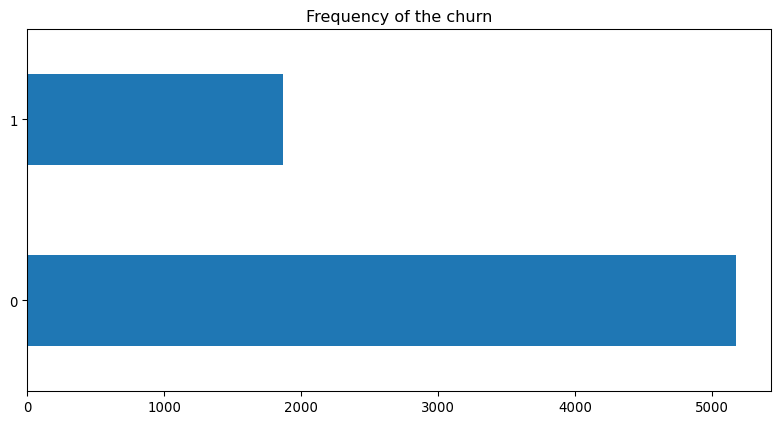

In [31]:
plt.figure(figsize=(10, 5), dpi=96)
df['Churn'].value_counts().plot(kind = 'barh')
plt.title("Frequency of the churn")
plt.show()

In [47]:
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [49]:
smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [50]:
y_resampled.value_counts()

0    3635
1    3635
Name: Churn, dtype: int64

In [55]:
#SVM Model
svc_model = SVC(random_state = 30)
svc_model.fit(X_resampled, y_resampled)

SVC(random_state=30)

In [56]:
svc_model.score(X_resampled, y_resampled)*100

57.27647867950482

In [57]:
y_test_pred_svm = svc_model.predict(X_test)
confusion_matrix(y_test, y_test_pred_svm)

array([[863, 676],
       [218, 356]], dtype=int64)

In [58]:
print(classification_report(y_test, y_test_pred_svm))

              precision    recall  f1-score   support

           0       0.80      0.56      0.66      1539
           1       0.34      0.62      0.44       574

    accuracy                           0.58      2113
   macro avg       0.57      0.59      0.55      2113
weighted avg       0.68      0.58      0.60      2113



In [59]:
#Random Forest Classifier
rf_clf = RandomForestClassifier(random_state = 42)
rf_clf.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [61]:
rf_clf.score(X_resampled, y_resampled)*100

99.88995873452545

In [62]:
y_test_pred_rfc = rf_clf.predict(X_test)

In [63]:
confusion_matrix(y_test, y_test_pred_rfc)

array([[1297,  242],
       [ 235,  339]], dtype=int64)

In [64]:
print(classification_report(y_test, y_test_pred_rfc))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1539
           1       0.58      0.59      0.59       574

    accuracy                           0.77      2113
   macro avg       0.72      0.72      0.72      2113
weighted avg       0.78      0.77      0.77      2113

